# Projeto 3
### Luiza Silveira e Jose Antonio Bechara

# Objetivo: 
### Determinar se uma pessoa é homem ou mulher dado caracteristicas da voz .

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [3]:
df = pd.read_csv('voice1.csv', quotechar=',')
df.columns=df.columns.str.replace('"','')
df['meanfreq'] = df['meanfreq'].map(lambda x: x.lstrip('"'))
df['label'] = df['label'].map(lambda x: x.lstrip('"').rstrip('""'))
df['meanfreq'] = df['meanfreq'].astype('float')


df.head(10)





,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [4]:
y = df['label'] == 'female'


In [5]:
#X = df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt']]
X = df[["meanfreq","sd","median","Q25","Q75","IQR"]]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape







(2217, 6)

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred = model.predict(X_test)



In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.879074658254469

In [10]:
male = X[0:1584]
female = X[1585:3168]
print(male.describe())
print(female.describe())







    
    
    




          meanfreq           sd       median          Q25          Q75  \
count  1584.000000  1584.000000  1584.000000  1584.000000  1584.000000   
mean      0.170813     0.065110     0.175299     0.115562     0.226346   
std       0.026254     0.009455     0.037392     0.031999     0.024050   
min       0.039363     0.041747     0.010975     0.000240     0.042946   
25%       0.155625     0.058957     0.149952     0.101205     0.211918   
50%       0.176343     0.061781     0.180612     0.122315     0.228117   
75%       0.190593     0.070915     0.202362     0.136044     0.244819   
max       0.225582     0.096030     0.248840     0.226740     0.268924   

               IQR  
count  1584.000000  
mean      0.110784  
std       0.020415  
min       0.021841  
25%       0.100960  
50%       0.109940  
75%       0.119331  
max       0.196168  
          meanfreq           sd       median          Q25          Q75  \
count  1583.000000  1583.000000  1583.000000  1583.000000  1583.000000

In [11]:
#boxplot = male.boxplot(column=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR'])
#boxplot2 = female.boxplot(column=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR'])





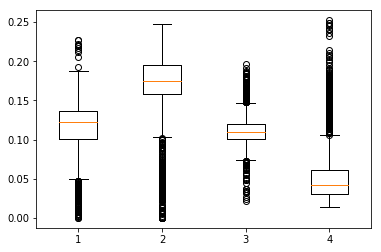

In [12]:
plt.boxplot([male["Q25"], female["Q25"], male["IQR"], female["IQR"]]);


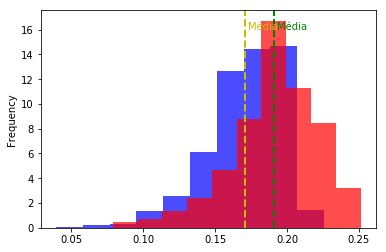

In [13]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    

plotm = male["meanfreq"].plot.hist(density=True,color = "blue",alpha = 0.7)
plotf = female["meanfreq"].plot.hist(density=True,color = "red",alpha = 0.7)



verticalLine(plotm, male.meanfreq.mean(), 16, "y", "Média")
verticalLine(plotf, female.meanfreq.mean(), 16, "g", "Média")




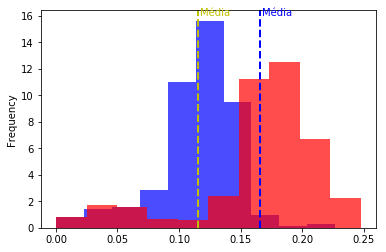

In [14]:
plot1 = male.Q25.plot.hist(density=True, color = "blue",alpha = 0.7)
plot2 = female.Q25.plot.hist(density=True,color = "red",alpha = 0.7)
verticalLine(plot1, male.Q25.mean(), 16, "y", "Média")

verticalLine(plot2, female.Q25.mean(), 16, "b", "Média")


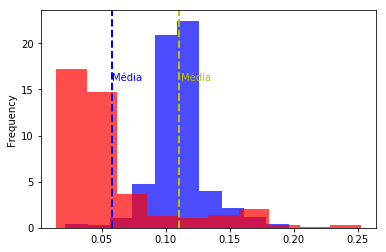

In [15]:

plot1 = male.IQR.plot.hist(density=True, color = "blue",alpha = 0.7)
plot2 = female.IQR.plot.hist(density=True, color = "red",alpha = 0.7)

verticalLine(plot1, male.IQR.mean(), 16, "y", "Média")


verticalLine(plot2, female.IQR.mean(), 16, "b", "Média")


In [16]:
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError
import sounddevice as sd
import pandas as pd

fs = 48000

duration = 2  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)

sd.default.samplerate = fs
sd.default.channels = 1

myrecording = sd.rec(int(duration * fs))


sd.wait()

print(myrecording)

[[ 0.005247  ]
 [ 0.00631976]
 [ 0.00602507]
 ...
 [-0.01061351]
 [-0.01082667]
 [-0.01108193]]


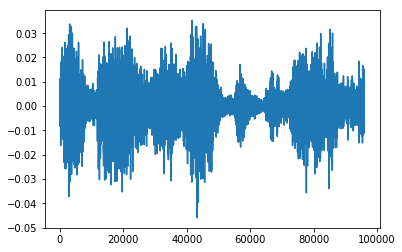

In [17]:
sd.play(myrecording, samplerate=None, mapping=None, blocking=False, loop=False)
plt.plot(myrecording)

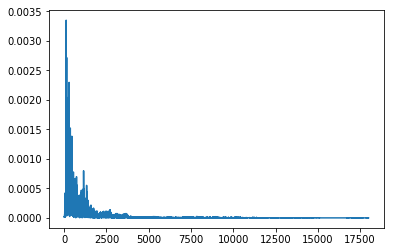

In [18]:
X = np.fft.fft(myrecording, axis=0)
X = np.abs(X)

fmax = 18000
nmax = int(len(X) * fmax / fs)

X = X[:nmax]
X = X / sum(X)
f = np.linspace(0, fmax, nmax)
plt.plot(f, X)

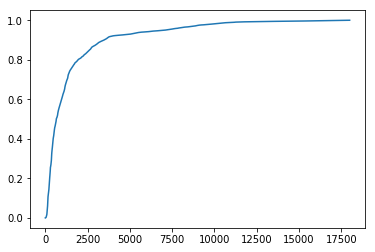

In [19]:
cX = np.cumsum(X)
plt.plot(f, cX)

In [20]:
dfr = pd.DataFrame(cX)
mean = dfr.describe()[0].values[2]
std = dfr.describe()[0].values[3]
Q25 = dfr.describe()[0].values[4]
median = dfr.describe()[0].values[5]
Q75 = dfr.describe()[0].values[6]
IQR = Q75 - Q25
dfr.describe()

,0
count,36000.000000
mean,0.916515
std,0.158379
min,0.000021
25%,0.925283
50%,0.973733
75%,0.994332
max,1.000002


In [21]:
result = model.predict([[mean, std , median , Q25, Q75 , IQR]])
print(result)

[ True]
